In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("goodreads_data.csv")


In [3]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [5]:
df = df.rename(columns={'Unnamed: 0': 'Id'})
df['Num_Ratings'] = pd.to_numeric(df['Num_Ratings'].str.replace(',', ''), errors='coerce')

In [6]:
df.describe()

,Id,Avg_Rating,Num_Ratings
count,10000.00000,10000.000000,1.000000e+04
mean,4999.50000,4.068577,9.305497e+04
std,2886.89568,0.335359,3.421488e+05
min,0.00000,0.000000,0.000000e+00
25%,2499.75000,3.880000,5.180000e+02
50%,4999.50000,4.080000,1.584350e+04
75%,7499.25000,4.260000,6.475100e+04
max,9999.00000,5.000000,9.278135e+06


In [7]:
print(df.isnull().sum())

Id              0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64


In [8]:
df.dtypes

Id               int64
Book            object
Author          object
Description     object
Genres          object
Avg_Rating     float64
Num_Ratings      int64
URL             object
dtype: object

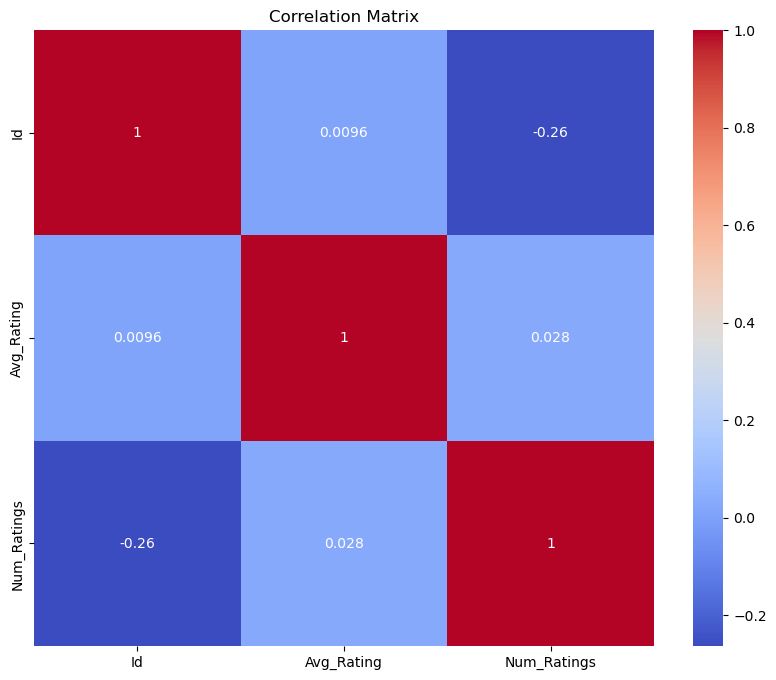

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

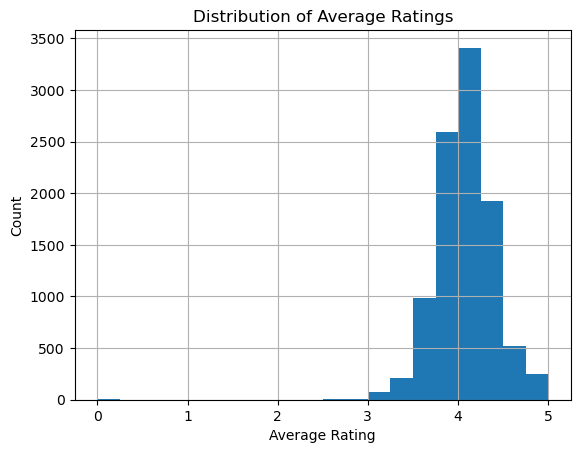

In [10]:
# Plot the distribution of average ratings
df['Avg_Rating'].hist(bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Distribution of Average Ratings')
plt.show()

In [11]:
# Most-Rated Books
most_rated = df.sort_values(by='Num_Ratings', ascending=False) \
    .head(10)[['Book', 'Author', 'Num_Ratings', 'Avg_Rating']]
print("\n Most-Rated Books:")
print(most_rated)


 Most-Rated Books:
                                                   Book               Author  \
1     Harry Potter and the Philosopher’s Stone (Harr...         J.K. Rowling   
4894            The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
6275                Hungerspelen (The Hunger Games, #1)      Suzanne Collins   
4868            The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
8608            The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
21              The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
77                     Twilight (The Twilight Saga, #1)      Stephenie Meyer   
0                                 To Kill a Mockingbird           Harper Lee   
7                                      The Great Gatsby  F. Scott Fitzgerald   
106                              The Fault in Our Stars           John Green   

      Num_Ratings  Avg_Rating  
1         9278135        4.47  
4894      7963186        4.33  
627

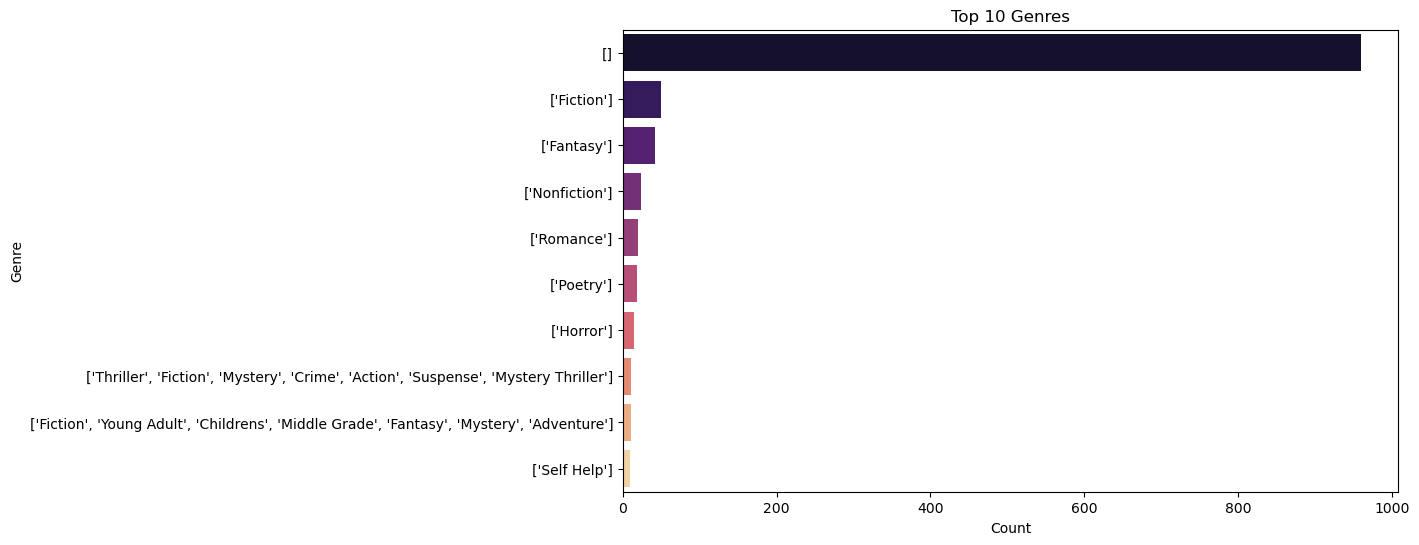

In [12]:
# Most common genres
genre_col = [col for col in df.columns if 'genre' in col.lower()]
if genre_col:
    genre_counts = df[genre_col[0]].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
    plt.title('Top 10 Genres')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.show()

In [16]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert the book descriptions into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
df['Description'] = df['Description'].fillna('')

tfidf_matrix = vectorizer.fit_transform(df['Description'])

# Compute K-Means clustering
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(tfidf_matrix)

# Add cluster number to the original dataframe
df['Cluster'] = kmeans.labels_

# Print the number of authors in each cluster
print(df.groupby('Cluster')['Author'].nunique())

AttributeError: 'NoneType' object has no attribute 'split'

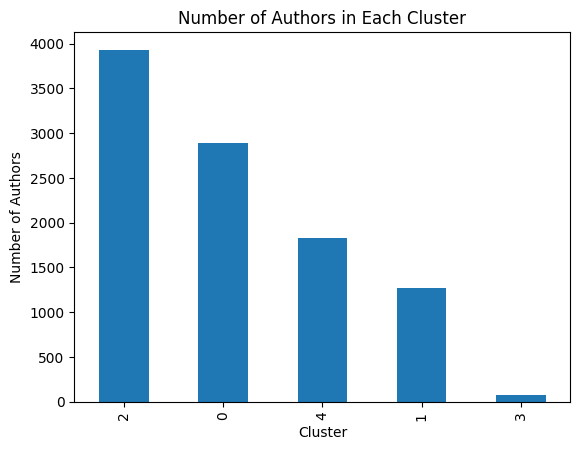

In [14]:
# Cluster Size Distribution
df['Cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Authors')
plt.title('Number of Authors in Each Cluster')
plt.show()


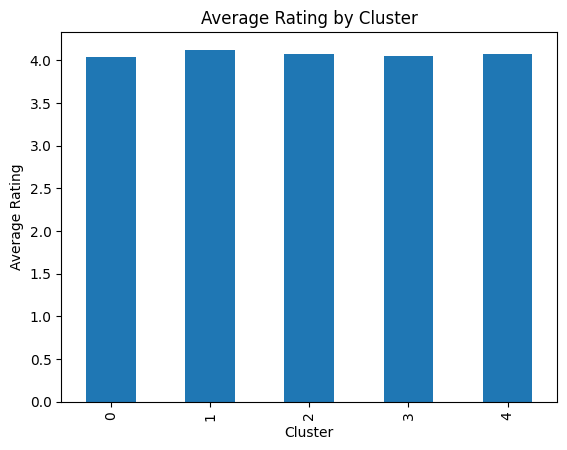

In [15]:
# Avg Rating by Cluster
df.groupby('Cluster')['Avg_Rating'].mean().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cluster')
plt.show()

In [16]:
from textblob import TextBlob

# Calculate sentiment polarity of descriptions
df['Sentiment'] = df['Description'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Check average sentiment by rating
print(df.groupby('Avg_Rating')['Sentiment'].mean())

Avg_Rating
0.00    0.064679
1.64   -0.152727
2.00    0.056162
2.03   -0.035625
2.41    0.031735
          ...   
4.95    0.077778
4.96    0.274366
4.97    0.136000
4.98    0.131548
5.00    0.110413
Name: Sentiment, Length: 211, dtype: float64


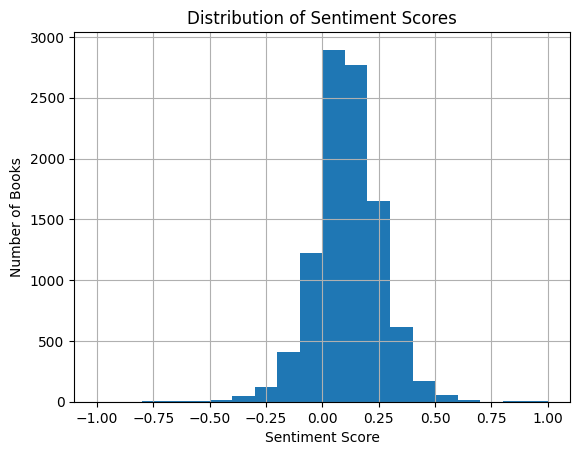

In [17]:
# Sentiment Distribution
df['Sentiment'].hist(bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Books')
plt.title('Distribution of Sentiment Scores')
plt.show()

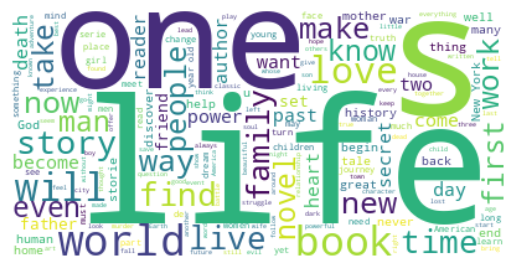

In [18]:
from wordcloud import WordCloud # Import the WordCloud class

# Generate a word cloud for book descriptions
text = ' '.join(description for description in df['Description'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

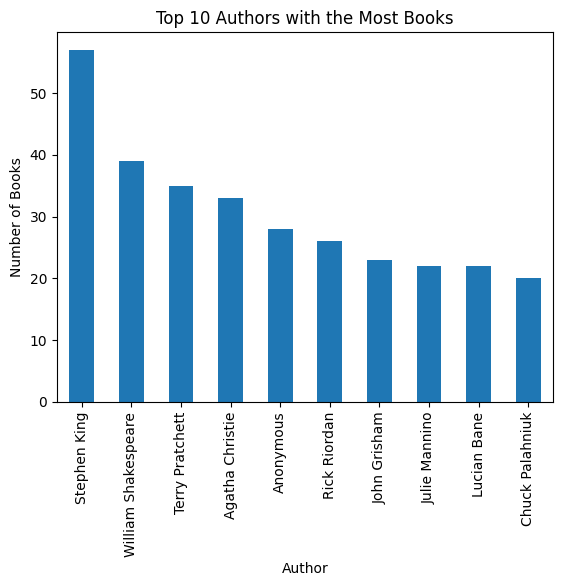

In [19]:
# Top authors by number of books
df['Author'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors with the Most Books')
plt.show()